In [1]:
import tensorflow as tf
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.mnist.load_data()

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape
# X_test[0] → the first image in the test dataset.
# X_test[0].shape → shows the shape of that first image.
# X_test[0] - It shows the pixel values of the first image in your test data.

(10000, 28, 28)

In [4]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
imput_shape=(28,28,1)
# In most commonly used image datasets, there are mainly two types of channels: 1. Channel 1 → Grayscale 2. Channel 3 → RGB (color)
# CNNs expect each image to have 3 dimensions: rows × columns × channels.
# CNN dataset must be in 3dimension
# Converting dataset into 3dimension ( rows * columns * Channel) Example : (28 rows * 28 columns * 1 channel)
# Channels for CNN can give 1 Channel or 3 Channel 
# X_test and X_train.shape[0] means counting number and accessing images in the dataset.
# X_train.reshape(X_train.shape[0],28,28,1) - Reshaping total images in the dataset into 28 rows and 28 columns and 1 channels 

In [5]:
type(X_test)
X_test.dtype  
# type(X_test) - Tells the type of the object itself (like numpy array)
# X_test.dtype - Tells the data type of the elements inside the array (like uint8 ) 

dtype('uint8')

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# astype() is a NumPy function that converts the data types.
# astype() converts (int into float),(float into int),(str into int),(int into bool),(float into bool).bool is true or false
# Example 32bits means a box contain 32 compartment in a box. there are 8 bits, 16 bits, 32 bits, 64 bits. we mainly use 32-bit and 64-bit data types.
# The dataset is a NumPy array.
# Using .astype('float32') only changes the type of the values inside the array from integers (like uint8) to 32-bit floating-point numbers (float32).
# After converting data type still the dataset will be numpy array 

In [7]:
# Preprocessing 
# 1. Image data - such as MNIST, CIFAR-10, or medical scans usually requires preprocessing like 
# 1. resizing, normalizing, reshaping, and sometimes data augmentation. Deep learning models: CNNs (Convolutional Neural Networks)
# 2. Text data - such as tweets, reviews, or articles is typically preprocessed through tokenization, converting to 
# 2. lowercase, removing stopwords, padding sequences, and embedding words into vectors. Deep learning models: RNNs, LSTMs, Transformers
# 3. Tabular data - from CSV files or Excel sheets often needs 
# 3. scaling, encoding of categorical features, and handling missing values through imputation. Deep learning models: Dense/Feedforward Networks (MLPs)
# 4. Audio data - like speech or music is preprocessed by sampling, normalization, and extracting features such as MFCCs. Deep learning models: RNNs, CNNs, 
# 4. 1D CNNs, Transformers
# 5. Time series - data such as stock prices or sensor readings usually requires
# 5. scaling, smoothing, windowing, and sometimes differencing to make it suitable for models. Deep learning models: RNNs, LSTMs, GRUs, Transformers

In [8]:
X_train/=255
X_test/=255
# dividing the dataset/255 is used for dataset value. Converting dataset value into 0 to 1.
# One-hot encoding is applied to labels or output.
# Categorical crossentropy is a loss function used for multi-class labels.
# categorical crossentropy is a formula used as a loss function for multi-class outputs.
# Converting pixels into 0–1
# This is called normalization.
# Done by dividing all pixel values by 255:
# ANN → can handle big numbers, normalization optional.
# CNN → needs small numbers, normalization important.
# For CNN it’s almost always necessary to convert pixel values into 0–1, no matter what dataset you use.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=imput_shape))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0,2))
model.add(Dense(10,activation=tf.nn.softmax))
          

C:\Users\Public\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9437 - loss: 0.1881
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9801 - loss: 0.0640
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9875 - loss: 0.0392
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9912 - loss: 0.0261
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9940 - loss: 0.0181
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9957 - loss: 0.0126
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9963 - loss: 0.0118
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9967 - loss: 0.0099
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9971 - loss: 0.0081
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9977 - loss: 0.0072


In [12]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
y_pred_classes = np.argmax(y_pred, axis=1)

In [16]:
cm=confusion_matrix(y_pred_classes,Y_test)
cm

array([[ 970,    0,    0,    0,    0,    1,    4,    1,    3,    0],
       [   1, 1128,    1,    0,    0,    1,    2,    2,    0,    1],
       [   3,    1, 1022,    1,    4,    1,    1,   12,    3,    0],
       [   0,    1,    0,  999,    0,    5,    1,    1,    3,    0],
       [   1,    1,    0,    0,  964,    0,    2,    1,    0,    9],
       [   2,    1,    0,    4,    0,  877,    3,    0,    1,    3],
       [   2,    2,    0,    0,    3,    2,  944,    0,    1,    0],
       [   1,    1,    7,    2,    1,    0,    0, 1006,    5,    3],
       [   0,    0,    1,    3,    1,    4,    1,    0,  955,    3],
       [   0,    0,    1,    1,    9,    1,    0,    5,    3,  990]])

In [17]:
cmm=classification_report(y_pred_classes,Y_test)
print(cmm)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       979
           1       0.99      0.99      0.99      1136
           2       0.99      0.98      0.98      1048
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       978
           5       0.98      0.98      0.98       891
           6       0.99      0.99      0.99       954
           7       0.98      0.98      0.98      1026
           8       0.98      0.99      0.98       968
           9       0.98      0.98      0.98      1010

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



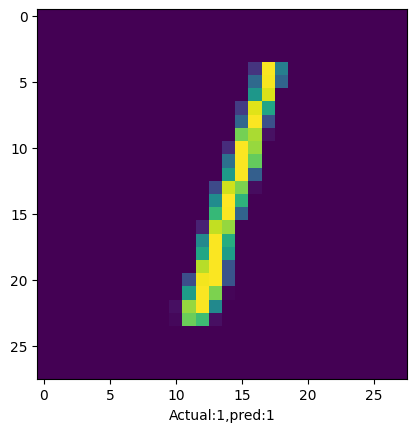

In [18]:
plt.imshow(X_test[2])
plt.xlabel('Actual:{},pred:{}'.format(Y_test[2],y_pred_classes[2]))
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9855 - loss: 0.0723


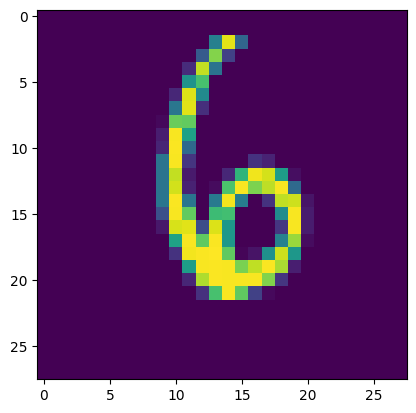

In [23]:
model.evaluate(X_test,Y_test)
import matplotlib.pyplot as plt
image_index=6900
plt.imshow(X_test[image_index].reshape(28,28))
# predic=X_test[image_index].reshape(28,28)
# pred=model.predict(X_test[image_index].reshape(1,28,28,1))
# print(pred.argmax())